In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random

%matplotlib inline

# Exploratory Data Analysis

## Data Overview

In [2]:
df=pd.read_csv('Consumer_complaints.csv')

/home/ubuntu/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (5,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head().T

,0,1,2,3,4
Date received,03/21/2016,03/21/2016,03/21/2016,03/21/2016,03/21/2016
Product,Debt collection,Consumer Loan,Debt collection,Consumer Loan,Bank account or service
Sub-product,"Other (i.e. phone, health club, etc.)",Personal line of credit,"Other (i.e. phone, health club, etc.)",Vehicle loan,Checking account
Issue,Cont'd attempts collect debt not owed,Problems when you are unable to pay,Cont'd attempts collect debt not owed,Taking out the loan or lease,Problems caused by my funds being low
Sub-issue,Debt was paid,NaN,Debt is not mine,NaN,NaN
Consumer complaint narrative,NaN,NaN,NaN,NaN,NaN
Company public response,Company believes it acted appropriately as aut...,NaN,NaN,NaN,NaN
Company,"Eastern Account Systems of Connecticut, Inc.","OneMain Financial Holdings, LLC",Transworld Systems Inc.,Navy FCU,Navy FCU
State,CA,AL,CT,VA,IN
ZIP code,900XX,35094,06516,235XX,46143


In [4]:
df.shape

(537992, 18)

In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537992 entries, 0 to 537991
Data columns (total 18 columns):
Date received                   537992 non-null object
Product                         537992 non-null object
Sub-product                     386187 non-null object
Issue                           537979 non-null object
Sub-issue                       203546 non-null object
Consumer complaint narrative    59697 non-null object
Company public response         75922 non-null object
Company                         537992 non-null object
State                           530979 non-null object
ZIP code                        533186 non-null object
Tags                            75267 non-null object
Consumer consent provided?      110728 non-null object
Submitted via                   537989 non-null object
Date sent to company            537992 non-null object
Company response to consumer    537992 non-null object
Timely response?                537992 non-null object
Consumer dis

In [6]:
df.shape

(537992, 18)

In [7]:
df['Consumer complaint narrative'].value_counts().shape

(58642,)

In [8]:
df['Company'].value_counts(dropna=False).shape

(3559,)

In [9]:
df['Product'].value_counts(dropna=False)

Mortgage                   182212
Debt collection             97237
Credit reporting            87166
Credit card                 64639
Bank account or service     60977
Consumer Loan               20100
Student loan                15392
Payday loan                  3751
Money transfers              3669
Prepaid card                 2345
Other financial service       504
Name: Product, dtype: int64

In [10]:
df['Sub-issue'].value_counts().shape

(68,)

In [11]:
df['Issue'].value_counts()

Loan modification,collection,foreclosure    95392
Incorrect information on credit report      63350
Loan servicing, payments, escrow account    58655
Cont'd attempts collect debt not owed       40685
Account opening, closing, or management     25940
Communication tactics                       17700
Disclosure verification of debt             17431
Deposits and withdrawals                    16770
Application, originator, mortgage broker    12969
Billing disputes                            10715
Other                                       10481
Credit reporting company's investigation     9943
Managing the loan or lease                   9501
Problems caused by my funds being low        8836
False statements or representation           7972
Unable to get credit report/credit score     7774
Improper contact or sharing of info          7139
Settlement process and costs                 6719
Problems when you are unable to pay          6658
Taking/threatening an illegal action         6310


In [12]:
df['Company public response'].value_counts(dropna=False)

NaN                                                                                                                        462070
Company chooses not to provide a public response                                                                            52483
Company believes it acted appropriately as authorized by contract or law                                                    13855
Company has responded to the consumer and the CFPB and chooses not to provide a public response                              3283
Company believes complaint caused principally by actions of third party outside the control or direction of the company      1412
Company disputes the facts presented in the complaint                                                                        1288
Company believes the complaint is the result of a misunderstanding                                                           1247
Company can't verify or dispute the facts in the complaint                                

In [13]:
df['Company response to consumer'].value_counts(dropna=False)

Closed with explanation            390227
Closed with non-monetary relief     67985
Closed with monetary relief         37186
Closed without relief               17909
Closed                              13069
Closed with relief                   5305
In progress                          3667
Untimely response                    2644
Name: Company response to consumer, dtype: int64

In [14]:
df['Tags'].value_counts(dropna=False)

NaN                              462725
Older American                    43743
Servicemember                     25396
Older American, Servicemember      6128
Name: Tags, dtype: int64

In [15]:
df['Submitted via'].value_counts(dropna=False)

Web            348870
Referral       106700
Phone           38683
Postal mail     35504
Fax              7888
Email             344
NaN                 3
Name: Submitted via, dtype: int64

In [16]:
df['Timely response?'].value_counts(dropna=False)

Yes    524461
No      13531
Name: Timely response?, dtype: int64

In [17]:
df['Consumer disputed?'].value_counts(dropna=False)

No     429175
Yes    108817
Name: Consumer disputed?, dtype: int64

In [18]:
company_complaitns_counts = df['Company'].value_counts()
df['company_complaint_counts'] = df['Company'].apply(lambda x: company_complaitns_counts[x])

In [19]:
temp= pd.crosstab(df['Product'], df['Consumer disputed?'])

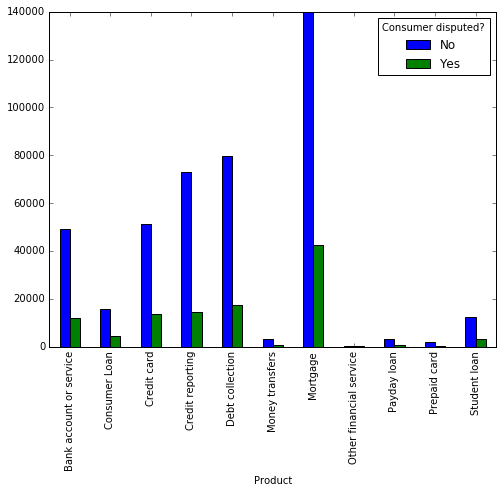

In [20]:
temp.plot(kind='bar',figsize=(8,6))## The disputed percentages are about same between 
###Consent and Consent Not "complaint narrative text".

In [21]:
temp1= pd.crosstab(df['Company response to consumer'], df['Consumer disputed?'])

In [22]:
temp1

Consumer disputed?,No,Yes
Company response to consumer,,
Closed,10243,2826
Closed with explanation,302637,87590
Closed with monetary relief,33101,4085
Closed with non-monetary relief,59237,8748
Closed with relief,4591,714
Closed without relief,13058,4851
In progress,3666,1
Untimely response,2642,2


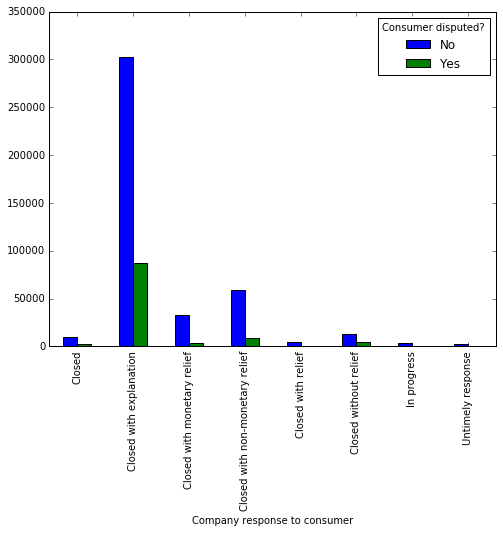

In [23]:
temp1.plot(kind='bar',figsize=(8,6)) ###Most cases are fall in closed with explaination

In [24]:
temp3= pd.crosstab(df['Product'], df['Consumer disputed?'])

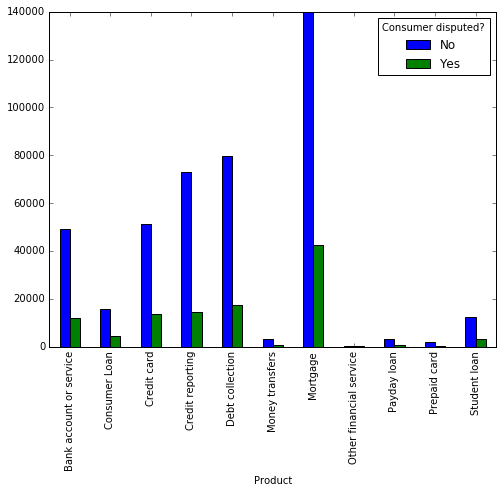

In [25]:
temp3.plot(kind='bar',figsize=(8,6))

In [26]:
##plt.hist(np.log(df['Company'].value_counts()))
##plt.xlabel(df['Company'].value_counts().index)

In [27]:
df['State'].value_counts().shape

(62,)

In [28]:
df['Date received']=pd.DatetimeIndex(df['Date received'],format='%m/%d/%Y').date
df['Date sent to company']=pd.DatetimeIndex(df['Date sent to company'],format='%m/%d/%Y').date

In [29]:
df[df['Date received']!=df['Date sent to company']].shape

(314405, 19)

## Missing Value Handling

In [30]:
df[pd.isnull(df['Issue'])]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,company_complaint_counts
22604,2016-01-24,Bank account or service,Checking account,NaN,NaN,NaN,NaN,JPMorgan Chase & Co.,WI,530XX,NaN,NaN,Web,2016-01-24,Closed with explanation,Yes,Yes,1755250,33075
31788,2016-01-05,Bank account or service,Checking account,NaN,NaN,NaN,Company chooses not to provide a public response,Citibank,CA,912XX,Older American,NaN,Web,2016-01-05,Closed with explanation,Yes,Yes,1726979,24879
66703,2015-10-15,Bank account or service,Checking account,NaN,NaN,NaN,Company believes it acted appropriately as aut...,TCF National Bank,MN,553XX,NaN,NaN,Web,2015-10-15,Closed with monetary relief,Yes,No,1608941,1038
69600,2015-10-09,Money transfers,Domestic (US) money transfer,NaN,NaN,NaN,NaN,"PayPal Holdings, Inc.",CA,900XX,NaN,NaN,Web,2015-10-09,Closed with explanation,Yes,No,1600411,2069
80795,2015-09-16,Consumer Loan,Vehicle loan,NaN,NaN,NaN,NaN,Santander Consumer USA Holdings Inc,OR,978XX,NaN,NaN,Web,2015-09-16,Closed with explanation,Yes,Yes,1566496,1947
82698,2015-09-11,Consumer Loan,Vehicle loan,NaN,NaN,NaN,Company chooses not to provide a public response,Ally Financial Inc.,TX,762XX,NaN,NaN,Web,2015-09-11,Closed with explanation,Yes,No,1560539,2215
109106,2015-07-21,Bank account or service,Checking account,NaN,NaN,NaN,Company chooses not to provide a public response,"SunTrust Banks, Inc.",VA,22030,NaN,Consent not provided,Web,2015-07-21,Closed with monetary relief,Yes,No,1479745,4737
184850,2015-02-10,Bank account or service,Other bank product/service,NaN,NaN,NaN,NaN,Wells Fargo & Company,FL,33428,NaN,NaN,Web,2015-02-10,Closed with explanation,Yes,No,1235087,41057
186858,2015-02-05,Bank account or service,Checking account,NaN,NaN,NaN,NaN,JPMorgan Chase & Co.,FL,33487,Servicemember,NaN,Web,2015-02-05,Closed with monetary relief,Yes,No,1226302,33075
225866,2014-10-29,Consumer Loan,Vehicle loan,NaN,NaN,NaN,NaN,USAA Savings,VA,23703,Servicemember,NaN,Web,2014-10-29,Closed with monetary relief,Yes,No,1092632,2102


In [31]:
df['Sub-product'].fillna('Not Provided',inplace=True)
df['Sub-issue'].fillna('Not Provided',inplace=True)
df['Consumer complaint narrative'].fillna('None or Not Provided',inplace=True)
###Combine "company public missing value" with "Company chose not to provide"
df['Company public response'].fillna('Company chooses not to provide',inplace=True) 

###Combine missing value of "Issue" with "Other"
df['Issue'].fillna('Other',inplace=True) 

### Replace missing vlaues of 'Tags' with "'Unknown'
df['Tags'].fillna('Unknown',inplace=True) 

### Replace missing vlaues of 'Submitted via' with "'other'
df['Submitted via'].fillna('Other',inplace=True) 

###Combine missing value,other,and withdrawn of "Consumer consent provided? " 
###with Consumer consent not provided, since only users's complaints narrative will be provided
### with the type of Consumer consent provided
df['Consumer consent provided?'].fillna('Consent not provided',inplace=True) 
df['Consumer consent provided?']=df['Consumer consent provided?'].apply(lambda x: 
            'Consent not provided' if x=='Other' or x=='Consent withdrawn' else x)

In [32]:
### Fill missing 'State' info using valide zipcode.
from pyzipcode import ZipCodeDatabase
zip=ZipCodeDatabase()
for i in df[pd.isnull(df['State'])&pd.notnull(df['ZIP code'])].index:
    try:
        df['State'][i]=str(zip[df['ZIP code'][i]].state)
    except:
        continue

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [33]:
df[pd.isnull(df['State'])&pd.isnull(df['ZIP code'])].shape ###Still 4268 users has no state info

(4268, 19)

In [34]:
df['State'].fillna('Not provided',inplace=True)
df['ZIP code'].fillna('Not Provided',inplace=True)

In [35]:
df['Consumer consent provided?'].value_counts(dropna=False)

Consent not provided    478295
Consent provided         59697
Name: Consumer consent provided?, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537992 entries, 0 to 537991
Data columns (total 19 columns):
Date received                   537992 non-null object
Product                         537992 non-null object
Sub-product                     537992 non-null object
Issue                           537992 non-null object
Sub-issue                       537992 non-null object
Consumer complaint narrative    537992 non-null object
Company public response         537992 non-null object
Company                         537992 non-null object
State                           537992 non-null object
ZIP code                        537992 non-null object
Tags                            537992 non-null object
Consumer consent provided?      537992 non-null object
Submitted via                   537992 non-null object
Date sent to company            537992 non-null object
Company response to consumer    537992 non-null object
Timely response?                537992 non-null object
Consumer 

In [37]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,company_complaint_counts
0,2016-03-21,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,None or Not Provided,Company believes it acted appropriately as aut...,"Eastern Account Systems of Connecticut, Inc.",CA,900XX,Unknown,Consent not provided,Web,2016-03-21,Closed with explanation,Yes,No,1841695,101
1,2016-03-21,Consumer Loan,Personal line of credit,Problems when you are unable to pay,Not Provided,None or Not Provided,Company chooses not to provide,"OneMain Financial Holdings, LLC",AL,35094,Unknown,Consent not provided,Phone,2016-03-21,In progress,Yes,No,1842862,719
2,2016-03-21,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,None or Not Provided,Company chooses not to provide,Transworld Systems Inc.,CT,06516,Unknown,Consent not provided,Web,2016-03-21,In progress,Yes,No,1841754,1371
3,2016-03-21,Consumer Loan,Vehicle loan,Taking out the loan or lease,Not Provided,None or Not Provided,Company chooses not to provide,Navy FCU,VA,235XX,Servicemember,Consent not provided,Web,2016-03-21,In progress,Yes,No,1841976,1552
4,2016-03-21,Bank account or service,Checking account,Problems caused by my funds being low,Not Provided,None or Not Provided,Company chooses not to provide,Navy FCU,IN,46143,Unknown,Consent not provided,Referral,2016-03-21,In progress,Yes,No,1842011,1552


In [38]:
df['State'].value_counts()

CA              79104
FL              51872
TX              39974
NY              37094
GA              23745
NJ              21707
PA              19392
IL              19003
VA              17540
MD              17125
OH              16850
NC              15047
MI              14114
AZ              11962
WA              11180
MA              10795
CO               9161
TN               8187
MO               7005
SC               6710
NV               6564
OR               6400
CT               6287
MN               6200
IN               5968
WI               5934
AL               5456
LA               5221
Not provided     4566
KY               3852
                ...  
DE               2844
NH               2761
NM               2667
KS               2606
MS               2490
AR               2315
IA               2186
ME               1882
HI               1869
ID               1856
RI               1846
NE               1684
WV               1416
PR               1253
VT        

# Feature Engineering

## Creating label

In [39]:
df=df[df['Consumer complaint narrative']!= 'None or Not Provided']

In [40]:
df = df[df['Company response to consumer']!='In progress']

In [41]:
df.shape

(59695, 19)

In [42]:
df['Company response to consumer'].value_counts(dropna=False)

Closed with explanation            45491
Closed with non-monetary relief     7738
Closed with monetary relief         4402
Closed                              1614
Untimely response                    450
Name: Company response to consumer, dtype: int64

In [43]:
replace={'Closed':0, 'Untimely response':0,'Closed without relief':0, 'Closed with explanation':1, 
         'Closed with non-monetary relief':2, 'Closed with relief': 2, 'Closed with monetary relief':2}

In [44]:
df['Company response to consumer']= df['Company response to consumer'].apply(lambda x: replace[x])

In [45]:
df['Date received']

1394      2016-03-09
1401      2016-03-09
1412      2016-03-09
1413      2016-03-09
1420      2016-03-09
1430      2016-03-09
1454      2016-03-09
1455      2016-03-09
1476      2016-03-09
1477      2016-03-09
1478      2016-03-09
1500      2016-03-09
1501      2016-03-09
1502      2016-03-09
1507      2016-03-09
1514      2016-03-09
1522      2016-03-08
1526      2016-03-08
1532      2016-03-08
1555      2016-03-08
1608      2016-03-08
1610      2016-03-08
1624      2016-03-08
1655      2016-03-08
1666      2016-03-08
1668      2016-03-08
1684      2016-03-08
1707      2016-03-08
1722      2016-03-08
1725      2016-03-08
             ...    
167553    2015-03-19
167563    2015-03-19
167566    2015-03-19
167573    2015-03-19
167579    2015-03-19
167581    2015-03-19
167591    2015-03-19
167596    2015-03-19
167597    2015-03-19
167599    2015-03-19
167600    2015-03-19
167607    2015-03-19
167608    2015-03-19
167623    2015-03-19
167627    2015-03-19
167647    2015-03-19
167655    201

## Feature creating

In [46]:
df_model = DataFrame() #Creat a new table including all the features for model

In [47]:
#Assign category feature values into categorical numerical value so as the ML modle fitting can handle it

feature_for_model=['Product', 'Sub-product','Issue','Sub-issue','Tags', 'State']

for name in feature_for_model:
    repl={}
    i=0
    for value in df[name].unique(): 
        repl[value] = i
        i+=1
       
    df[name] = df[name].apply(lambda x: repl[x])
    df_model[name] = df[name].astype('category')
           

In [48]:
#Creat feature for 'Timely response' boolean
replace2 = {'Yes': True, 'No': False}
df['Timely response?'] = df['Timely response?'].apply(lambda x: replace2[x])
#df_model=pd.concat([df_model,df['Timely response?']],axis=1)

In [49]:
#Creat feature for 'Consumer consent provided?' boolean
replace1={'Consent provided':True, 'Consent not provided':False}
#df_model['Consumer consent provided?']= df['Consumer consent provided?'].apply(lambda x: replace1[x])

In [50]:
##process time refers to days between the date CFPB received complaitns and the date 
##when complaints were sent to company on behal of comsume
df['Process time']=(df['Date sent to company']-df['Date received']).astype('timedelta64[D]').astype(int)
#df_model=pd.concat([df_model,df['Process time']],axis=1)

In [51]:
##Create features about complaint submitted time
#df_model['Date_received_year'] = df['Date received'].apply(lambda x: x.year)
df_model['Date_sent_month'] = df['Date sent to company'].apply(lambda x: x.month)
df_model['Date_sent_day'] = df['Date sent to company'].apply(lambda x: x.day)

In [52]:
#count the number of complaints for each company 
company_complaitns_counts = df['Company'].value_counts()
df_model['company_complaint_counts'] = df['Company'].apply(lambda x: company_complaitns_counts[x])

In [53]:
df_model.head().T

,1394,1401,1412,1413,1420
Product,0,0,0,1,2
Sub-product,0,0,0,1,0
Issue,0,1,1,2,3
Sub-issue,0,1,1,2,3
Tags,0,0,0,0,0
State,0,1,1,2,1
Date_sent_month,3,3,3,3,3
Date_sent_day,9,9,9,9,9
company_complaint_counts,3467,3467,3439,26,375


In [54]:
tem = pd.crosstab(df['company_complaint_counts'], df['Company response to consumer'])

In [55]:
tem['norelief_rate'] = tem[0] /(tem[0] + tem[1] + tem[2])

In [56]:
tem['relief_rate'] = tem[2] /(tem[0] + tem[1] + tem[2])

In [57]:
tem.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            12840, 15269, 20614, 24169, 24879, 29426, 30115, 33075, 41057,
            55052],
           dtype='int64', name=u'company_complaint_counts', length=334)

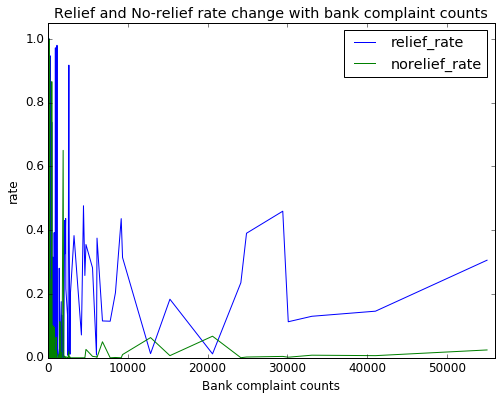

In [58]:
fig = plt.figure(figsize=(8,6))
plt.plot(tem.index,tem['relief_rate'])
plt.plot(tem.index,tem['norelief_rate'])
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rcParams.update({'font.size': 12})
plt.xlim([0.0, 56000])
plt.ylim([0.0, 1.05])
plt.xlabel('Bank complaint counts')
plt.ylabel('rate')
plt.title('Relief and No-relief rate change with bank complaint counts')
plt.legend(loc="upper right")
plt.show()
fig.savefig('Relief_rate_complaint_Counts.png')

In [59]:
day_sent = df['Date sent to company'].apply(lambda x: x.day)
month_sent = df['Date sent to company'].apply(lambda x: x.month)
year_sent = df['Date sent to company'].apply(lambda x: x.year)

In [60]:
tem1 = pd.crosstab(month_sent,df['Company response to consumer'])

In [61]:
tem1['norelief_rate'] = tem1[0] /(tem1[0] + tem1[1] + tem1[2])
tem1['relief_rate'] = tem1[2] /(tem1[0] + tem1[1] + tem1[2])

In [62]:
tem1

Company response to consumer,0,1,2,norelief_rate,relief_rate
Date sent to company,,,,,
1,182,3578,863,0.039368,0.186675
2,74,1727,508,0.032049,0.220009
3,49,1454,411,0.025601,0.214734
4,111,3722,1029,0.022830,0.211641
5,158,3489,938,0.034460,0.204580
6,203,4490,1167,0.034642,0.199147
7,229,5096,1325,0.034436,0.199248
8,206,4915,1253,0.032319,0.196580
9,166,4667,1058,0.028179,0.179596


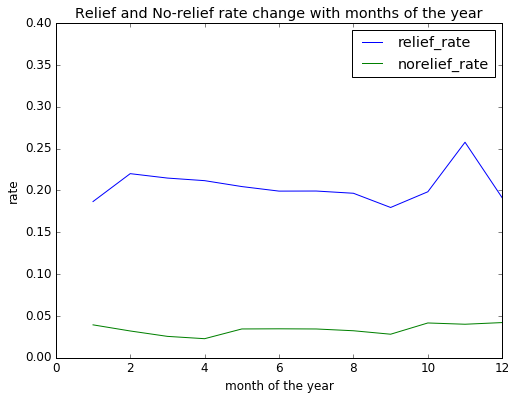

In [63]:
fig = plt.figure(figsize=(8,6))
plt.plot(tem1.index,tem1['relief_rate'])
plt.plot(tem1.index,tem1['norelief_rate'])
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rcParams.update({'font.size': 12})
plt.xlim([0.0, 12])
plt.ylim([0.0, 0.4])
plt.xlabel('month of the year')
plt.ylabel('rate')
plt.title('Relief and No-relief rate change with months of the year')
plt.legend(loc="upper right")
plt.show()
fig.savefig('Relief_rate_months.png')

In [64]:
tem2 = pd.crosstab(df['State'], df['Company response to consumer'])
tem2['norelief_rate'] = tem2[0] /(tem2[0] + tem2[1] + tem2[2])
tem2['relief_rate'] = tem2[2] /(tem2[0] + tem2[1] + tem2[2])

In [65]:
tem2

Company response to consumer,0,1,2,norelief_rate,relief_rate
State,,,,,
0,9,320,88,0.021583,0.211031
1,92,2502,762,0.027414,0.227056
2,159,3888,1022,0.031367,0.201618
3,171,4135,1006,0.032191,0.189383
4,73,2129,548,0.026545,0.199273
5,42,816,188,0.040153,0.179732
6,19,502,133,0.029052,0.203364
7,57,1605,445,0.027053,0.211201
8,4,194,58,0.015625,0.226562


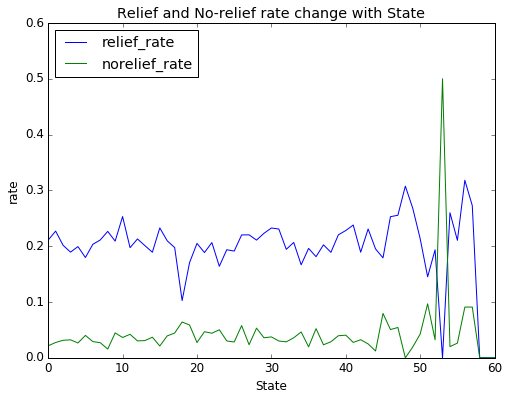

In [66]:
fig = plt.figure(figsize=(8,6))
plt.plot(tem2.index,tem2['relief_rate'])
plt.plot(tem2.index,tem2['norelief_rate'])
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rcParams.update({'font.size': 12})
plt.xlim([0.0, 60])
plt.ylim([0.0, 0.6])
plt.xlabel('State')
plt.ylabel('rate')
plt.title('Relief and No-relief rate change with State')
plt.legend(loc="upper left")
plt.show()
fig.savefig('Relief_rate_States.png')

In [67]:
df['State'].value_counts()

11    8907
3     5312
2     5069
1     3356
4     2750
14    2167
7     2107
12    2080
13    1945
20    1936
9     1884
32    1749
24    1456
42    1390
27    1366
10    1126
5     1046
22    1022
36     938
37     815
40     789
38     730
25     706
21     684
23     677
6      654
28     621
43     602
33     474
0      417
      ... 
30     374
49     362
19     340
31     299
41     290
26     277
46     257
8      256
17     248
16     229
50     211
45     201
15     189
47     184
39     177
34     108
35     102
44      82
18      78
51      62
52      62
54      50
55      38
56      22
48      13
57      11
58       3
53       2
60       2
59       1
Name: State, dtype: int64

# Modeling

In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
import sklearn.metrics as skm
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from scipy import interp
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC

### Model with non-complaint-narrative features

In [69]:
X = df_model.values
y = df['Company response to consumer']
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = 3

In [70]:
y_bin.shape

(59695, 3)

In [71]:
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.20, random_state=67)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


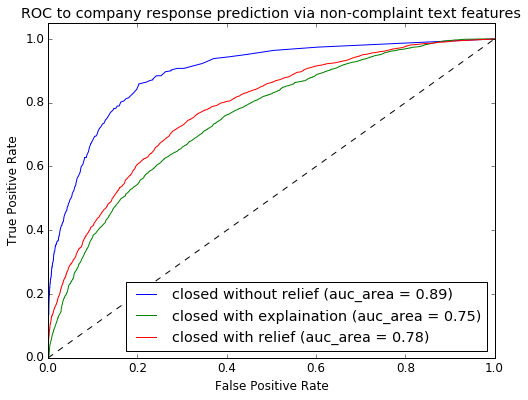

In [73]:
# Learn to predict each class against the other using Naiive Bysian classifier over tfidf text
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='auto' ), n_jobs=-1)
y_score = classifier.fit(X_train, y_train_bin).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i],y_score[:, i],drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
#all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
#mean_tpr = np.zeros_like(all_fpr)
#for i in range(n_classes):
  #  mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
#mean_tpr /= n_classes

#fpr["macro"] = all_fpr
#tpr["macro"] = mean_tpr
#roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig = plt.figure(figsize=(8,6))
#plt.plot(fpr["micro"], tpr["micro"],
   #      label='micro-average ROC curve (area = {0:0.2f})'
     #          ''.format(roc_auc["micro"]),
      #   linewidth=2)

#plt.plot(fpr["macro"], tpr["macro"],
      #   label='macro-average ROC curve (area = {0:0.2f})'
       #        ''.format(roc_auc["macro"]),
       #  linewidth=2)

lable = ['closed without relief', 'closed with explaination', 'closed with relief']
for i,v in enumerate(lable):
    plt.plot(fpr[i], tpr[i], label= v + ' (auc_area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC to company response prediction via non-complaint text features')
plt.legend(loc="lower right")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rcParams.update({'font.size': 12})

plt.show()
fig.savefig('company_repsonse_auc_Nontext.png')

In [74]:
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='auto' )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
def plot_importance(clf, X, max_features=10):
    '''Plot feature importance'''
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (X.columns[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')
    plt.title('Non-Text Feature Importance')
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
    plt.rcParams.update({'font.size': 16})

    plt.show()
    

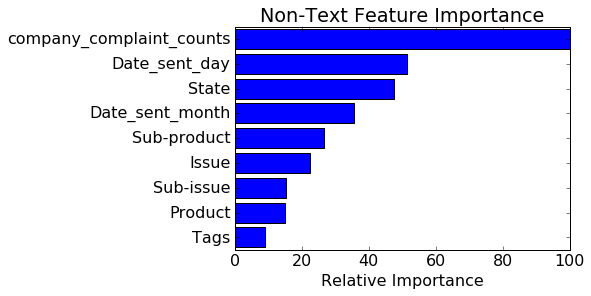

In [76]:
plot_importance(rfc, df_model, max_features=20)
fig.savefig('FeatureImportance_Nontext_ResponsePred.png')

### model using features extracted from 'complaint narrative text'

In [77]:
chars_to_remove = ['XX', 'XXX', 'XXXX']
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(lambda x: x.translate(None, ''.join(chars_to_remove)))

In [78]:
X_word = df['Consumer complaint narrative'].values
y = df['Company response to consumer'].values

y = label_binarize(y, classes=[0, 1, 2])
n_classes = 3

X_train_word, X_test_word, y_train, y_test = train_test_split(X_word, y, test_size=0.20, random_state=67)
vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, min_df=0.001, max_df = 0.2,
                             )
words_matrix_train =vectorizer.fit_transform(X_train_word)
words_matrix_test = vectorizer.transform(X_test_word)
words_matrix = vectorizer.transform(X_word)


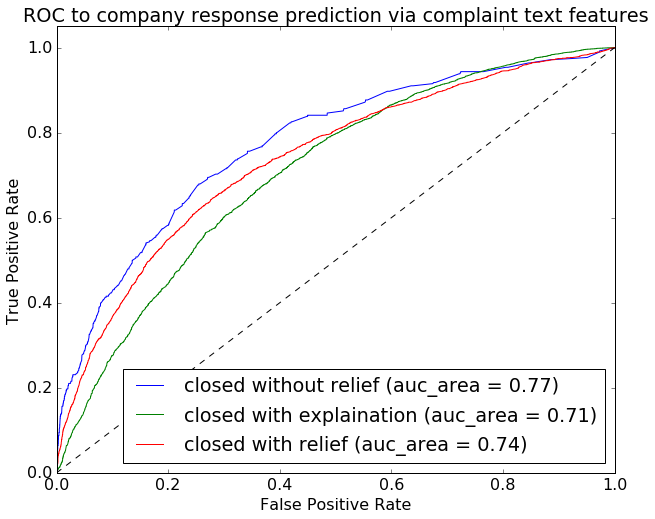

In [79]:
# Learn to predict each class against the other using random forest classifier over tfidf text
nbc = OneVsRestClassifier(RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='auto'),n_jobs=-1)
y_score = nbc.fit(words_matrix_train, y_train).predict_proba(words_matrix_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
#all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
#mean_tpr = np.zeros_like(all_fpr)
#for i in range(n_classes):
  #  mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
#mean_tpr /= n_classes

#fpr["macro"] = all_fpr
#tpr["macro"] = mean_tpr
#roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,8))
#plt.plot(fpr["micro"], tpr["micro"],
    #     label='micro-average ROC curve (area = {0:0.2f})'
    #           ''.format(roc_auc["micro"]),
    #     linewidth=2)

#plt.plot(fpr["macro"], tpr["macro"],
     #    label='macro-average ROC curve (area = {0:0.2f})'
     #          ''.format(roc_auc["macro"]),
    #   linewidth=2)

lable = ['closed without relief', 'closed with explaination', 'closed with relief']
for i,v in enumerate(lable):
    plt.plot(fpr[i], tpr[i], label= v + ' (auc_area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC to company response prediction via complaint text features')
plt.legend(loc="lower right")

plt.show()
fig.savefig('company_repsonse_auc_text_random Forest.png')

In [80]:
#

In [81]:
y1= df['Company response to consumer']
X_train_word, X_test_word, y_train, y_test = train_test_split(X_word, y1, test_size=0.20, random_state=67)
vectorizer = TfidfVectorizer(stop_words='english',lowercase=False, min_df=0.001, max_df = 0.2,
                             )
words_matrix_train =vectorizer.fit_transform(X_train_word)
words_matrix_test = vectorizer.transform(X_test_word)
words_matrix = vectorizer.transform(X_word)

In [82]:
nbc1 = MultinomialNB().fit(words_matrix_train, y_train)

In [83]:
y_score1 = nbc1.fit(words_matrix_train, y_train).predict_proba(words_matrix_test)

In [84]:
y_score

array([[ 0.008     ,  0.666     ,  0.344     ],
       [ 0.008     ,  0.408     ,  0.594     ],
       [ 0.034     ,  0.36447567,  0.614     ],
       ..., 
       [ 0.014     ,  0.88515023,  0.0793431 ],
       [ 0.028     ,  0.83247567,  0.15      ],
       [ 0.10192989,  0.79724422,  0.146     ]])

In [85]:
nbc1.predict(words_matrix_test)

array([2, 1, 1, ..., 1, 1, 1])

In [86]:
nbc1.feature_log_prob_ [2,:]

array([-10.12937012,  -7.2019738 ,  -7.42023886, ...,  -8.84683741,
        -8.18172253,  -9.95982906])

In [87]:
ind = list(np.argsort(nbc1.feature_log_prob_ [2,:]))[::-1][:50] #index of 50 most import features for "closed with relief"

In [88]:
feature = list(vectorizer.get_feature_names())

In [89]:
for i in ind:
    print feature[i]

card
Bank
bank
2015
money
fee
balance
Experian
late
phone
number
letter
said
fees
collection
charge
charged
reporting
days
accounts
check
My
payments
service
times
charges
removed
day
years
asked
month
dispute
address
calls
America
Credit
contacted
It
remove
months
date
customer
On
We
closed
statement
make
just
know
online


### Wordcloud Preprocess

In [90]:
from nltk.corpus import stopwords

In [91]:
stops = set(stopwords.words('english'))

In [92]:
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stops ]))

In [93]:
word_Nodispute = df[df['Consumer disputed?']=='No']['Consumer complaint narrative']

In [94]:
word_Nodispute = word_Nodispute.sample(frac=0.3)

In [95]:
word_Nodispute.shape

(13724,)

In [96]:
np.savetxt('word_nodispute.txt', word_Nodispute, fmt='%s')